<a href="https://colab.research.google.com/github/raynajindal/Heart_Disease_Prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset on predicting wether or not someone has a heart disease. 

There are thirteen features and one target as below:

*   age: The person's age in years
*   sex: The person's sex (1 = male, 0 = female)
*   cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
*   trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
*   chol: The person's cholesterol measurement in mg/dl
*   fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
*   restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
*   thalach: The person's maximum heart rate achieved
*   exang: Exercise induced angina (1 = yes; 0 = no)
*   oldpeak: ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
*   ca: The number of major vessels (0-3)
*   thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
*   target: Heart disease (0 = no, 1 = yes)

Data Source - https://www.kaggle.com/ronitf/heart-disease-uci

<font color='blue'>Import the required libraries</font>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font color="blue">Read the dataset and check for null values

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv') 

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
# Check for null values
df.info() 
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

***Since there are no null values I didn't have to clean up the dataset.***

In [ ]:
# Check for anyone with age less than 1
df[df['age'] < 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


<font color="blue">Checking for uniqueness</font>

In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
df['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [ ]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [ ]:
df['fbs'].unique()

array([1, 0])

In [ ]:
df['restecg'].unique()

array([0, 1, 2])

In [ ]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [ ]:
df['exang'].unique()

array([0, 1])

In [ ]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [ ]:
df['slope'].unique()

array([0, 2, 1])

In [ ]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
df['target'].unique()

array([1, 0])

<font color="blue">Data analysis using various plots</blue>

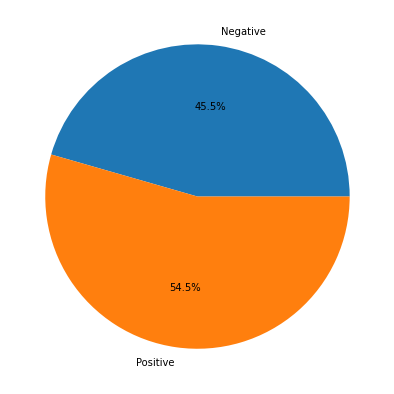

In [ ]:
# Plot to show %age of negative and positive cases
df_group_heart_patient = df.groupby('target').size()
labels_heart_patient = ['Negative','Positive']
fig = plt.figure(figsize =(10, 7))
plt.pie(df_group_heart_patient,autopct='%.1f%%',labels = labels_heart_patient)
plt.show()

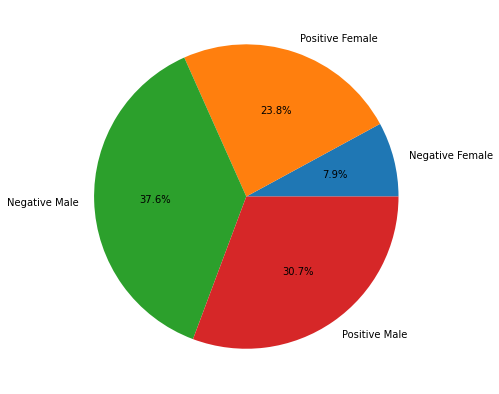

In [ ]:
# Plot to show %age of negative and positive cases by gender
df_group_heart_patient_by_gender = df.groupby(['sex','target']).size()
labels_heart_patient_by_gender = ['Negative Female','Positive Female', 'Negative Male', 'Positive Male'] 
fig = plt.figure(figsize =(10, 7))
plt.pie(df_group_heart_patient_by_gender,autopct='%.1f%%',labels = labels_heart_patient_by_gender)
plt.show()

<font color="blue">These histograms show the comparison between the catagories and the count of how many people are heart patients</font>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


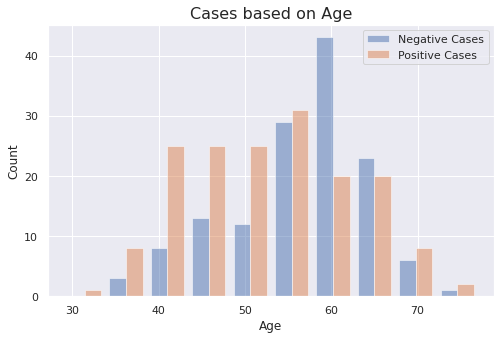

In [ ]:
# Plot to show # of negative and positive heart patients by age
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("Age")
#y value
plt.ylabel("Count") 
plt.title('Cases based on Age', size=16)
df_negative_patient_by_age = df[df.target==0].age
df_positive_patient_by_age = df[df.target==1].age
labels_heart_patient_by_age = ['Negative Cases','Positive Cases'] 
plt.hist([df_negative_patient_by_age,df_positive_patient_by_age],alpha=0.5, label = labels_heart_patient_by_age)
plt.legend()
plt.savefig('heart_patient_by_age.png')
plt.show()


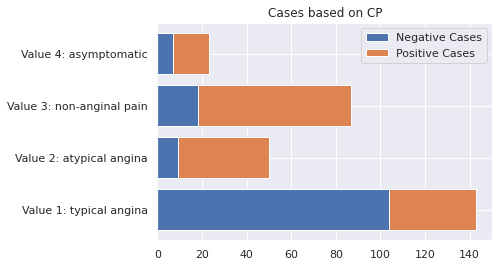

In [ ]:
# Plot to show # of positive and negative cases by CP (chest pain type)
x=['Value 1: typical angina','Value 2: atypical angina','Value 3: non-anginal pain','Value 4: asymptomatic']
y_negative=df[df.target==0].groupby(['cp']).size()
y_positive=df[df.target==1].groupby(['cp']).size()
# Create horizontal bars
plt.barh(x, y_negative)
plt.barh(x, y_positive, left=y_negative)
plt.legend(['Negative Cases','Positive Cases']);
# Add title
plt.title('Cases based on CP');
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


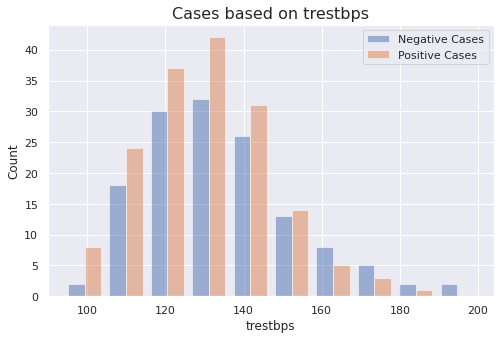

In [ ]:
 #Plot to show # of negative and positive heart patients by trestbps (resting blood pressure)
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("trestbps")
#y value
plt.ylabel("Count") 
plt.title('Cases based on trestbps', size=16)
df_negative_patient_by_trestbps = df[df.target==0].trestbps
df_positive_patient_by_trestbps = df[df.target==1].trestbps
labels_heart_patient_by_trestbps = ['Negative Cases','Positive Cases'] 
plt.hist([df_negative_patient_by_trestbps,df_positive_patient_by_trestbps],alpha=0.5, label = labels_heart_patient_by_trestbps)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


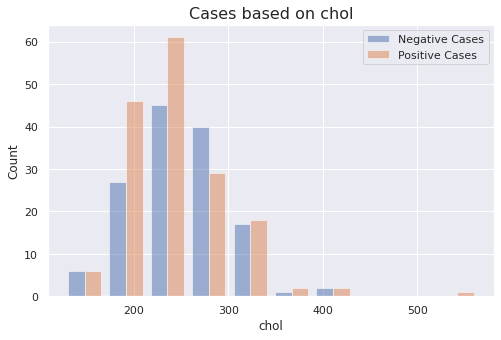

In [ ]:
#Plot to show # of negative and positive heart patients by cholestoral
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("chol")
#y value
plt.ylabel("Count") 
plt.title('Cases based on chol', size=16)

df_negative_patient_by_chol = df[df.target==0].chol
df_positive_patient_by_chol = df[df.target==1].chol

labels_heart_patient_by_chol = ['Negative Cases','Positive Cases'] 

plt.hist([df_negative_patient_by_chol,df_positive_patient_by_chol],alpha=0.5, label = labels_heart_patient_by_chol)

plt.legend()
plt.show()

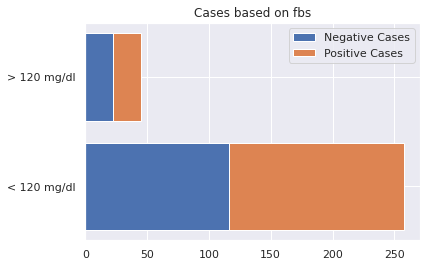

In [ ]:
#Plot to show # of negative and positive heart patients by fbs (The person's fasting blood sugar)
x=['< 120 mg/dl','> 120 mg/dl']
y_negative=df[df.target==0].groupby(['fbs']).size()
y_positive=df[df.target==1].groupby(['fbs']).size()
# Create horizontal bars
plt.barh(x, y_negative)
plt.barh(x, y_positive, left=y_negative)
plt.legend(['Negative Cases','Positive Cases']);
# Add title
plt.title('Cases based on fbs');
plt.show()

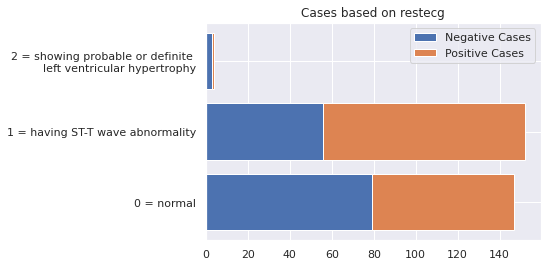

In [ ]:
#Plot to show # of negative and positive heart patients by restecg (resting electrocardiographic)

x=['0 = normal','1 = having ST-T wave abnormality','2 = showing probable or definite \nleft ventricular hypertrophy']
y_negative=df[df.target==0].groupby(['restecg']).size()
y_positive=df[df.target==1].groupby(['restecg']).size()
# Create horizontal bars
plt.barh(x, y_negative)
plt.barh(x, y_positive, left=y_negative)
plt.legend(['Negative Cases','Positive Cases']);
# Add title
plt.title('Cases based on restecg');
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


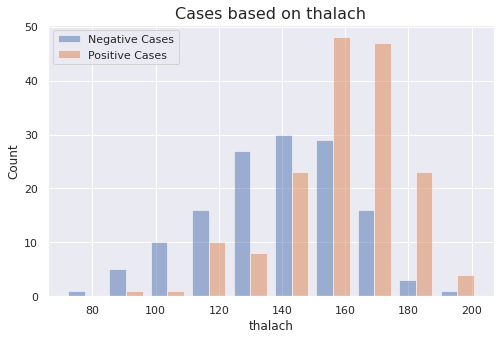

In [ ]:
#Plot to show # of negative and positive heart patients by thalach (The person's maximum heart rate achieved)
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("thalach")
#y value
plt.ylabel("Count") 
plt.title('Cases based on thalach', size=16)
df_negative_patient_by_thalach = df[df.target==0].thalach
df_positive_patient_by_thalach = df[df.target==1].thalach
labels_heart_patient_by_thalach = ['Negative Cases','Positive Cases'] 
plt.hist([df_negative_patient_by_thalach,df_positive_patient_by_thalach],alpha=0.5, label = labels_heart_patient_by_thalach)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


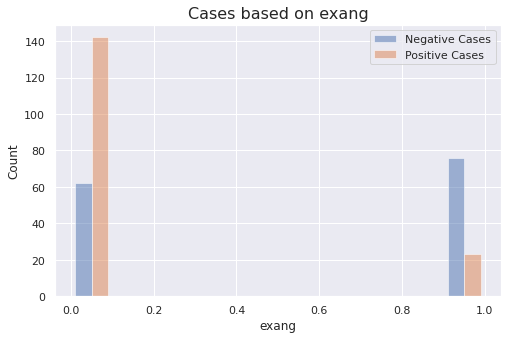

In [ ]:
#Plot to show # of negative and positive heart patients by exang (Exercise induced angina)
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("exang")
#y value
plt.ylabel("Count") 
plt.title('Cases based on exang', size=16)

df_negative_patient_by_exang = df[df.target==0].exang
df_positive_patient_by_exang = df[df.target==1].exang

labels_heart_patient_by_exang = ['Negative Cases','Positive Cases'] 

plt.hist([df_negative_patient_by_exang,df_positive_patient_by_exang],alpha=0.5, label = labels_heart_patient_by_exang)

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


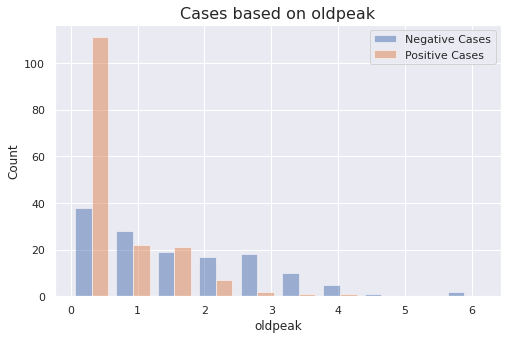

In [ ]:
#Plot to show # of negative and positive heart patients by oldpeak (ST depression induced by exercise relative to rest)
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("oldpeak")
#y value
plt.ylabel("Count") 
plt.title('Cases based on oldpeak', size=16)

df_negative_patient_by_oldpeak = df[df.target==0].oldpeak
df_positive_patient_by_oldpeak = df[df.target==1].oldpeak

labels_heart_patient_by_oldpeak = ['Negative Cases','Positive Cases'] 

plt.hist([df_negative_patient_by_oldpeak,df_positive_patient_by_oldpeak],alpha=0.5, label = labels_heart_patient_by_oldpeak)

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


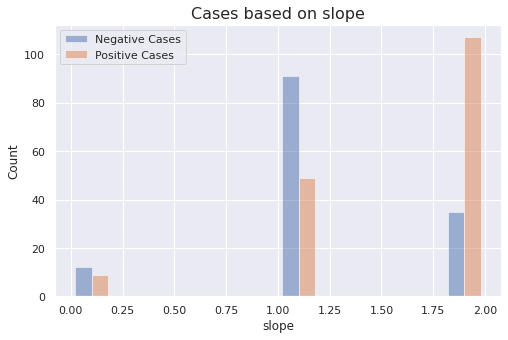

In [ ]:
#Plot to show # of negative and positive heart patients by slope (the slope of the peak exercise ST segment)
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("slope")
#y value
plt.ylabel("Count") 
plt.title('Cases based on slope', size=16)
df_negative_patient_by_slope = df[df.target==0].slope
df_positive_patient_by_slope = df[df.target==1].slope
labels_heart_patient_by_slope = ['Negative Cases','Positive Cases'] 
plt.hist([df_negative_patient_by_slope,df_positive_patient_by_slope],alpha=0.5, label = labels_heart_patient_by_slope)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


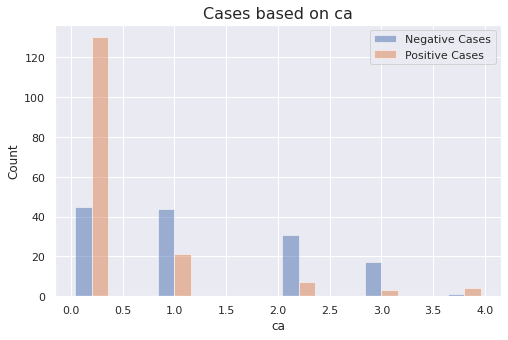

In [ ]:
#Plot to show # of negative and positive heart patients by ca (The number of major vessels (0-3))


sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("ca")
#y value
plt.ylabel("Count") 
plt.title('Cases based on ca', size=16)

df_negative_patient_by_ca = df[df.target==0].ca
df_positive_patient_by_ca = df[df.target==1].ca

labels_heart_patient_by_ca = ['Negative Cases','Positive Cases'] 

plt.hist([df_negative_patient_by_ca,df_positive_patient_by_ca],alpha=0.5, label = labels_heart_patient_by_ca)

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


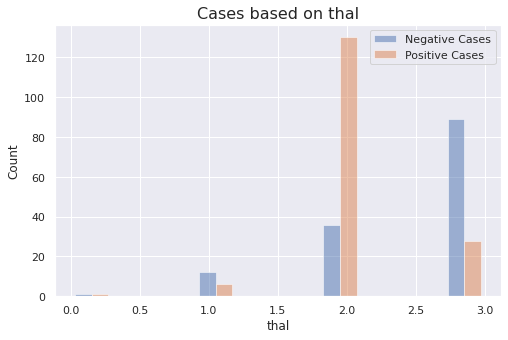

In [ ]:
#Plot to show # of negative and positive heart patients by thal (A blood disorder called thalassemia 1 = normal; 2 = fixed defect; 3 = reversable defect))
sns.set()
plt.figure(figsize=(8,5))
#x value
plt.xlabel("thal")
#y value
plt.ylabel("Count") 
plt.title('Cases based on thal', size=16)

df_negative_patient_by_thal = df[df.target==0].thal
df_positive_patient_by_thal = df[df.target==1].thal

labels_heart_patient_by_thal = ['Negative Cases','Positive Cases'] 

plt.hist([df_negative_patient_by_thal,df_positive_patient_by_thal],alpha=0.5, label = labels_heart_patient_by_thal)

plt.legend()
plt.show()

<font color="blue">Finding correlations using heat map between different categories</font>

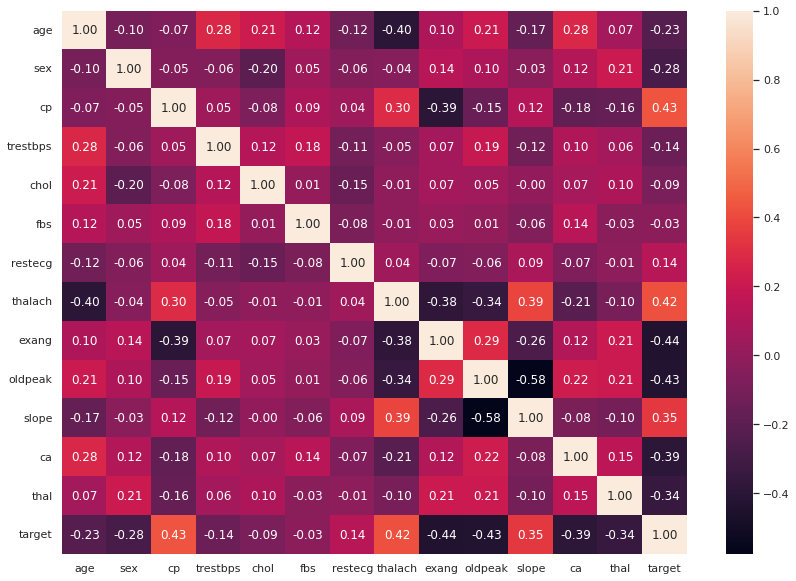

In [ ]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(), annot = True, fmt=".2f")


<font color="blue">Pairplot to show relationships in the dataset</font>

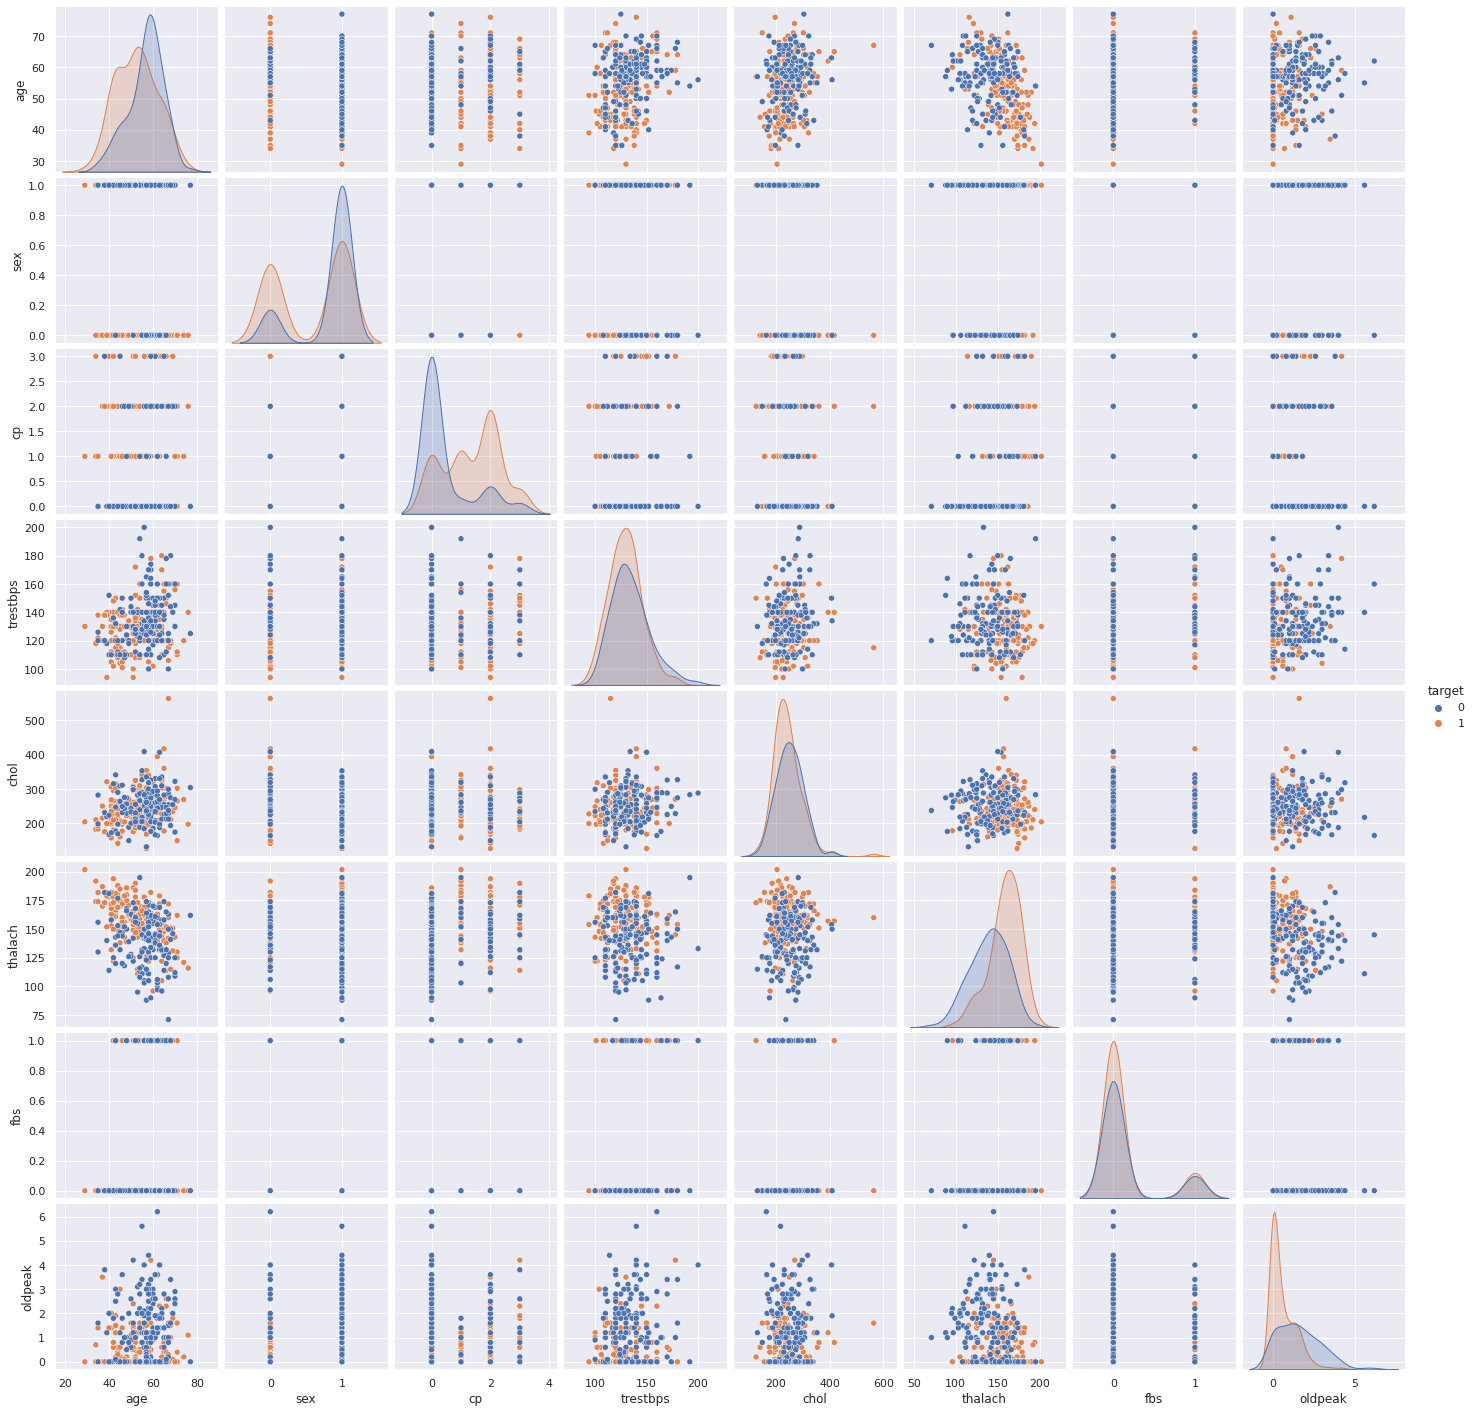

In [ ]:
sns.pairplot(df[['age','sex','cp','trestbps', 'chol','thalach','fbs','oldpeak','target']], hue='target')

plt.show()

<font color="blue">Preparing dataset for modeling</font>

In [ ]:
# y variable
y = df['target']
# x variable
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

In [ ]:
# Splitting the training and test data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y)

In [ ]:
X.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
dtype: int64

In [ ]:
X_train.count() 

age         227
sex         227
cp          227
trestbps    227
chol        227
fbs         227
restecg     227
thalach     227
exang       227
oldpeak     227
slope       227
ca          227
thal        227
dtype: int64

In [ ]:
X_val.count() 

age         76
sex         76
cp          76
trestbps    76
chol        76
fbs         76
restecg     76
thalach     76
exang       76
oldpeak     76
slope       76
ca          76
thal        76
dtype: int64

<font color="blue">Building model using the test and training dataset</font>

<font color="blue">Model 1: Using Neural network (No hidden layer)</font>

In [ ]:
bce = BinaryCrossentropy()

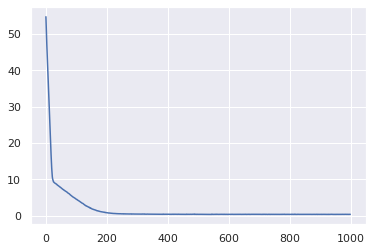

In [ ]:
# deletes model if it was created before
model = 0 
# Create a neural network. Only the input layer
model = Sequential()
# Adds a layer with 1 node. This will be the output layer. It also sets the 
# activation function of thus layer to be the sigmoid function
model.add(Dense(1, activation='sigmoid'))
# Tells what error will be minimized. Note: loss = error
model.compile(loss='binary_crossentropy')
# Trains the model, epochs is the muber of steps the algorith takes (beyond 
# the scope of our course, verbose = 0 is so that it does not print stuff on the 
# screen)
model.fit(X_train,y_train,epochs=1000,verbose=0)
# creates a list with the value of the error after each step
J_list = model.history.history['loss']
# plots the error after each step 
plt.plot(J_list)

In [ ]:
y_val_hat = model.predict(X_val)
print('Validation error = ',bce(y_val,y_val_hat).numpy())

y_train_hat = model.predict(X_train)
print('Validation error = ',bce(y_train,y_train_hat).numpy())

Validation error =  1.3075719
Validation error =  1.4177086


**`Result - Classification Report`**

In [ ]:
Y_train_hat_cat = 1*(y_train_hat > 0.5)
print(classification_report(y_train,Y_train_hat_cat))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       108
           1       0.89      0.84      0.87       119

    accuracy                           0.86       227
   macro avg       0.86      0.86      0.86       227
weighted avg       0.87      0.86      0.86       227



In [ ]:
Y_val_hat_cat = 1*(y_val_hat > 0.5)
print(classification_report(y_val,Y_val_hat_cat))

              precision    recall  f1-score   support

           0       0.67      0.87      0.75        30
           1       0.89      0.72      0.80        46

    accuracy                           0.78        76
   macro avg       0.78      0.79      0.77        76
weighted avg       0.80      0.78      0.78        76



<font color="blue">Model *2*: Using Neural network (Hidden layer with 2 nodes)</font>

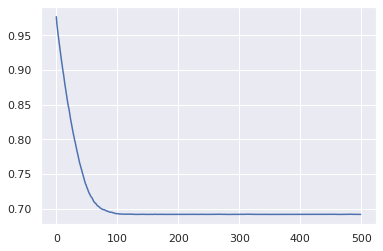

In [ ]:
# deletes model if it was created before
model = 0 
# Create a neural network. Only the input layer
model = Sequential()
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Tells what error will be minimized. Note: loss = error
model.compile(loss='binary_crossentropy')
# Trains the model, epochs is the muber of steps the algorith takes (beyond 
# the scope of our course, verbose = 0 is so that it does not print stuff on the 
# screen)
model.fit(X_train,y_train,epochs=500,verbose=0)
# creates a list with the value of the error after each step
J_list = model.history.history['loss']
# plots the error after each step 
plt.plot(J_list)

In [ ]:
y_val_hat = model.predict(X_val)
print('Validation error = ',bce(y_val,y_val_hat).numpy())

y_train_hat = model.predict(X_train)
print('Validation error = ',bce(y_train,y_train_hat).numpy())

Validation error =  0.6842696
Validation error =  0.6919728


In [ ]:
Y_train_hat_cat = 1*(y_train_hat > 0.5)
print(classification_report(y_train,Y_train_hat_cat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.52      1.00      0.69       119

    accuracy                           0.52       227
   macro avg       0.26      0.50      0.34       227
weighted avg       0.27      0.52      0.36       227



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Y_val_hat_cat = 1*(y_val_hat > 0.5)
print(classification_report(y_val,Y_val_hat_cat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.61      1.00      0.75        46

    accuracy                           0.61        76
   macro avg       0.30      0.50      0.38        76
weighted avg       0.37      0.61      0.46        76



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<font color="blue">Model *3*: Using Neural network (2 Hidden layer with 2 and 4 nodes)</font>



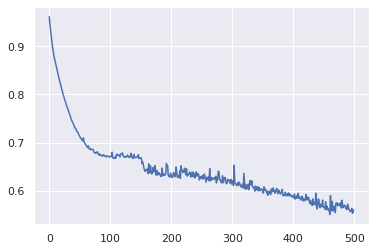

In [ ]:
# deletes model if it was created before
model = 0 
# Create a neural network. Only the input layer
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Tells what error will be minimized. Note: loss = error
model.compile(loss='binary_crossentropy')
# Trains the model, epochs is the muber of steps the algorith takes (beyond 
# the scope of our course, verbose = 0 is so that it does not print stuff on the 
# screen)
model.fit(X_train,y_train,epochs=500,verbose=0)
# creates a list with the value of the error after each step
J_list = model.history.history['loss']
# plots the error after each step 
plt.plot(J_list)

In [ ]:
y_val_hat = model.predict(X_val)
print('Validation error = ',bce(y_val,y_val_hat).numpy())

y_train_hat = model.predict(X_train)
print('Validation error = ',bce(y_train,y_train_hat).numpy())

Validation error =  0.79088783
Validation error =  0.81508


In [ ]:
Y_train_hat_cat = 1*(y_train_hat > 0.5)
print(classification_report(y_train,Y_train_hat_cat))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       108
           1       0.77      0.74      0.75       119

    accuracy                           0.74       227
   macro avg       0.74      0.74      0.74       227
weighted avg       0.75      0.74      0.74       227



In [ ]:
Y_val_hat_cat = 1*(y_val_hat > 0.5)
print(classification_report(y_val,Y_val_hat_cat))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        30
           1       0.75      0.72      0.73        46

    accuracy                           0.68        76
   macro avg       0.67      0.68      0.67        76
weighted avg       0.69      0.68      0.69        76



<font color="blue">Model 4: Using Logistic Regression</font>

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8157894736842105

In [ ]:
Y_val_hat_logistics = model.predict(X_val)

print(classification_report(y_val,Y_val_hat_logistics))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.85      0.85      0.85        46

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



<font color="blue">Model 5: Using Decision Tree Classifier</font>

In [ ]:
from sklearn import tree
from sklearn import metrics

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

model.score(X_val, y_val)


0.6973684210526315

**Classification Report**

In [ ]:
Y_val_hat_decision = model.predict(X_val)

print(classification_report(y_val,Y_val_hat_decision))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65        30
           1       0.78      0.70      0.74        46

    accuracy                           0.70        76
   macro avg       0.69      0.70      0.69        76
weighted avg       0.71      0.70      0.70        76



<font color="blue">Model 6: Using Random Forest Classifier</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

model.score(X_val, y_val)

0.7763157894736842

**Classification Report**

In [ ]:
y_val_hat_random = model.predict(X_val)

print(classification_report(y_val,y_val_hat_random))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        30
           1       0.85      0.76      0.80        46

    accuracy                           0.78        76
   macro avg       0.77      0.78      0.77        76
weighted avg       0.79      0.78      0.78        76

